In [2]:
# Name: Khalid Hasan
# BearPass: M03543550

""" 
Q1: Load the data in a DataFrame (DF) named tips. 
    Assume all files are in the same folder as your Python notebook.
"""

import pandas as pd

tips = pd.read_csv('tips.csv')

In [11]:
# Q2: Find the names of the columns.

print(tips.columns)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [15]:
# Q3: Rename the columns “time” as “meal” and “size” as “party size”.

tips.rename(columns={"time": "meal", "size": "party size"}, inplace=True)

print(tips.columns)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'meal', 'party size'], dtype='object')


In [16]:
# Q4: Use the head function to view parts of the data.

print(tips.head(5))

   total_bill   tip     sex smoker  day    meal  party size
0       16.99  1.01  Female     No  Sun  Dinner           2
1       10.34  1.66    Male     No  Sun  Dinner           3
2       21.01  3.50    Male     No  Sun  Dinner           3
3       23.68  3.31    Male     No  Sun  Dinner           2
4       24.59  3.61  Female     No  Sun  Dinner           4


In [21]:
"""
Q5: Retrieve the information in the second and third rows 
    using two different methods (you can use .loc, .iloc, or the slicing notation, :).
"""

# Using iloc and slice methods
print(tips.iloc[1:3])
print(tips[1:3])

   total_bill   tip   sex smoker  day    meal  party size
1       10.34  1.66  Male     No  Sun  Dinner           3
2       21.01  3.50  Male     No  Sun  Dinner           3
   total_bill   tip   sex smoker  day    meal  party size
1       10.34  1.66  Male     No  Sun  Dinner           3
2       21.01  3.50  Male     No  Sun  Dinner           3


In [25]:
"""
Q6: Retrieve the information in the first and second columns (i.e., under total_bill and tip). 
    Use the head function to display the first three rows under these two columns.
"""

print(tips[["total_bill", "tip"]].head(3))

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50


In [26]:
"""
Q7: Get the information stored in the cell at the intersection of the second row and third column. 
    I.e., what is the sex of the customer (who paid for the meal) that is stored in the second row of the DF?
"""

print(tips.iloc[1, 2])

Male


In [96]:
# Q8: Find the number of observations in the dataset.

# Counting total indices (i.e. index attribute returns series, that was covered in class)
# Other ways not covered in class are len(tips), tips.shape[0]
print(len(tips.index))

244


In [33]:
# Q9: Use the describe function to get basic statistics about the numerical attributes.

print(tips.describe())

       total_bill         tip  party size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [36]:
"""
Q10: Use the describe function to get basic statistics about all attributes. 
     It is okay to have the value NaN shown in some places.
"""

# include='all' is used to get stats about all attributes
print(tips.describe(include='all'))

        total_bill         tip   sex smoker  day    meal  party size
count   244.000000  244.000000   244    244  244     244  244.000000
unique         NaN         NaN     2      2    4       2         NaN
top            NaN         NaN  Male     No  Sat  Dinner         NaN
freq           NaN         NaN   157    151   87     176         NaN
mean     19.785943    2.998279   NaN    NaN  NaN     NaN    2.569672
std       8.902412    1.383638   NaN    NaN  NaN     NaN    0.951100
min       3.070000    1.000000   NaN    NaN  NaN     NaN    1.000000
25%      13.347500    2.000000   NaN    NaN  NaN     NaN    2.000000
50%      17.795000    2.900000   NaN    NaN  NaN     NaN    2.000000
75%      24.127500    3.562500   NaN    NaN  NaN     NaN    3.000000
max      50.810000   10.000000   NaN    NaN  NaN     NaN    6.000000


In [39]:
# Q11: Find the average tip amount.

print(tips["tip"].mean())

2.99827868852459


In [40]:
"""
Q12: Get basic statistics about the tip column using the describe function.
     This helps give an idea about the min, max, and median values of a tip in addition to other basic statistics.
"""

print(tips["tip"].describe())

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64


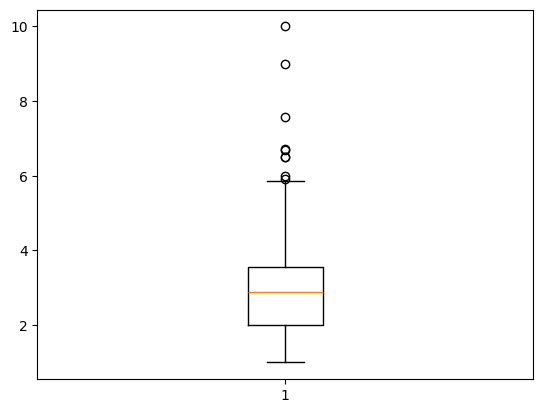

In [9]:
"""
Q13: Draw a boxplot of the tip column. 
     This gives a visual representation of the tips data and shows outliers.
"""

import matplotlib.pyplot as plt

plt.boxplot(tips["tip"])
plt.show()

In [45]:
# Q14: From the boxplot, it looks that the outliers are for tips >= 6.
#      Retrieve the rows where the tip amount is >= 6. 

# Using boolean expression to filter
print(tips[tips["tip"] >= 6])

     total_bill    tip     sex smoker   day    meal  party size
23        39.42   7.58    Male     No   Sat  Dinner           4
47        32.40   6.00    Male     No   Sun  Dinner           4
59        48.27   6.73    Male     No   Sat  Dinner           4
141       34.30   6.70    Male     No  Thur   Lunch           6
170       50.81  10.00    Male    Yes   Sat  Dinner           3
183       23.17   6.50    Male    Yes   Sun  Dinner           4
212       48.33   9.00    Male     No   Sat  Dinner           4
214       28.17   6.50  Female    Yes   Sat  Dinner           3


In [92]:
# Q15: Use the groupby function to find the average tip amount per sex. 
#      i.e., find the average tip by male customers and the average tip by female customers. 
#      It is okay if your command gives the averages for all numeric attributes.

print(tips["tip"].groupby(tips["sex"]).mean())

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


In [70]:
# Q16: Create a DF named males that contains the male samples in the tips DF. 
#      Then, call males.sample(10) to draw a random sample of 10 male observations.

# Filtering with boolean indexing
males = tips[tips["sex"] == "Male"]

print(males.sample(10))

     total_bill   tip   sex smoker   day    meal  party size
58        11.24  1.76  Male    Yes   Sat  Dinner           2
174       16.82  4.00  Male    Yes   Sun  Dinner           2
5         25.29  4.71  Male     No   Sun  Dinner           4
42        13.94  3.06  Male     No   Sun  Dinner           2
27        12.69  2.00  Male     No   Sat  Dinner           2
184       40.55  3.00  Male    Yes   Sun  Dinner           2
3         23.68  3.31  Male     No   Sun  Dinner           2
142       41.19  5.00  Male     No  Thur   Lunch           5
227       20.45  3.00  Male     No   Sat  Dinner           4
39        31.27  5.00  Male     No   Sat  Dinner           3
157


In [168]:
# Q17: Create a DF named females that contains the female samples in the tips DF. 
#      Then, call females.sample(frac=0.1, replace = True) 
#      to generate and display a random sample with a replacement that consists of 10% of the size of the females DF. 

# Filtering with boolean indexing
females = tips[tips["sex"] == "Female"]

females.sample(frac=0.1, replace= True)

,total_bill,tip,sex,smoker,day,meal,party size
169,10.63,2.00,Female,Yes,Sat,Dinner,2
117,10.65,1.50,Female,No,Thur,Lunch,2
21,20.29,2.75,Female,No,Sat,Dinner,2
209,12.76,2.23,Female,Yes,Sat,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
221,13.42,3.48,Female,Yes,Fri,Lunch,2
188,18.15,3.50,Female,Yes,Sun,Dinner,3
205,16.47,3.23,Female,Yes,Thur,Lunch,3
202,13.00,2.00,Female,Yes,Thur,Lunch,2


In [167]:
# Q18: Write code to find out the number of male customers and the number of female customers.

# counting the number of males and females respectively
males_count = len(males)
females_count = len(females)

print(males_count, females_count)

157 87


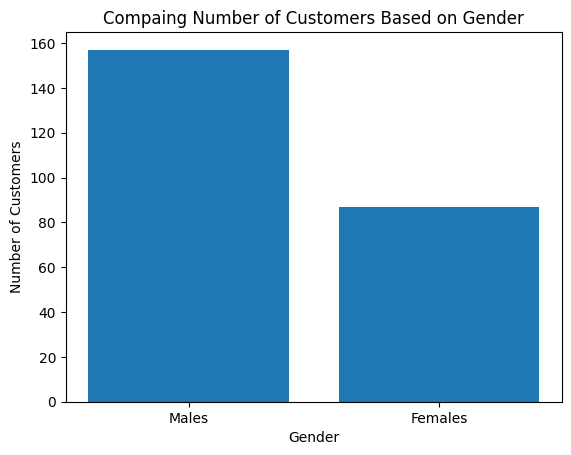

In [164]:
# Q19: Create a bar chart comparing the number of males and the number of females in the dataset. 
#      Give labels to the x-axis, and y-axis, and a title to the plot.

# Assigning data for x and y axis
x_data = ["Males", "Females"]
y_data = [len(males), len(females)]

plt.bar(x_data, y_data)
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.title("Compaing Number of Customers Based on Gender")
plt.show()

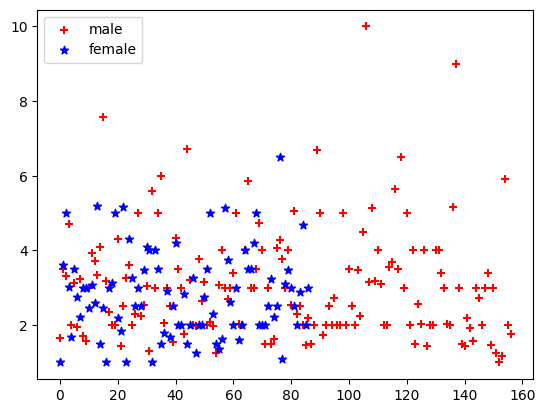

In [80]:
"""
Q20: Draw a scatter plot of the tips given by male customers and a scatter plot of the tips given by female customers.
     Notice, for easier comparison, you need to show the two scatter plots in the same subplot area. 
     Make sure to label the data and show a legend.
"""

males_count = len(males)
females_count = len(females)

# Plot the scatter point of the male tip (y-axis) against the iterated number of males (x-axis)
plt.scatter(range(males_count), males["tip"], label="male", color='r', marker='+')

# Plot the scatter point of the female tip (y-axis) against the iterated number of females (x-axis)
plt.scatter(range(females_count), females["tip"], label="female", color='b', marker='*')
plt.legend(loc='upper left')
plt.show()

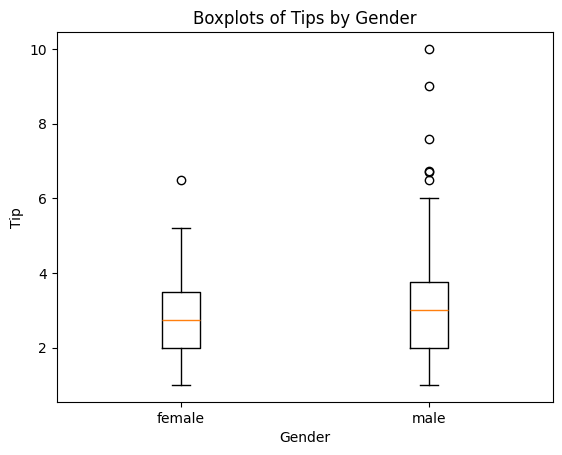

In [82]:
"""
Q21: Draw two box plots to show tips per sex. 
     One box plot to show the tips by females while the other to show tips by males. 
     Show both plots in the same area 
     (i.e., do not create separate subplot areas for each boxplot because that is visually easier to compare.)
"""

plt.boxplot([females["tip"], males["tip"]], labels=["female", "male"])
plt.xlabel("Gender")
plt.ylabel("Tip")
plt.title("Boxplots of Tips by Gender")
plt.show()

In [169]:
# Q22: Apply the describe function on the “day” column of the tips DF and observe the result.

print(tips["day"].describe())

count     244
unique      4
top       Sat
freq       87
Name: day, dtype: object


In [101]:
"""
Q23: Use the groupby function to form groups based on the days of the week. 
     The result of this shows the number of customers that were served every day. 
     Notice: you do not need to worry about the individual customers as shown under the "party size" attribute. 
     We are treating each observation, regardless of party size, as one customer.
"""

# groupby size() method returns the group size for each day
print(tips.groupby('day').size())

day
Fri     19
Sat     87
Sun     76
Thur    62
dtype: int64

In [171]:
"""
Q24: Write code to find the number of customers served every day. Store the result in a variable(s). 
     Remember: you do not need to worry about the individual customers as shown under the size attribute. 
     We are treating each observation, regardless of party size, as one customer.
"""

# The result of tips.groupby(...) is not a DataFrame. 
# To get a DataFrame back, we have to apply a function (e.g. here to_frame) to each group's
count_per_day = tips.groupby("day").size().to_frame('count')
print(count_per_day)

      count
day        
Fri      19
Sat      87
Sun      76
Thur     62


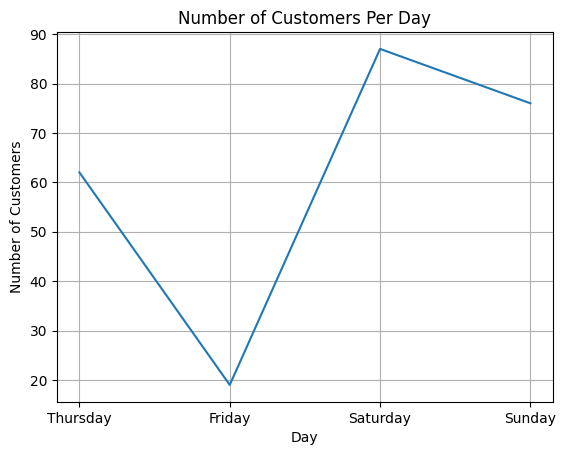

In [131]:
"""
Q25: Draw a line plot that shows the number of customers served every day.
     Use the following line to specify tick locations and labels of the x-axis:
        plt.xticks([0.0,1.0,2.0,3.0], ["Thursday", "Friday", "Saturday", "Sunday"])
     Use the following line to show a grid:
        plt.grid(True)
"""

# The given ordinal ranking of days
days_order = ["Thursday", "Friday", "Saturday", "Sunday"]

# Mapping days between data frame days and given days
days_map = {"Thursday": "Thur", "Friday": "Fri", "Saturday": "Sat", "Sunday": "Sun"}

# Getting counts order by given days for the y-axis, "count_per_day" is used from Q24
y_data = [count_per_day.loc[days_map[day]]["count"] for day in days_order]

# Setting days on the x-axis and counts on the y-axis
plt.plot(days_order, y_data)

# Given configuration
plt.xticks([0.0,1.0,2.0,3.0], days)
plt.grid(True)
plt.xlabel("Day")
plt.ylabel("Number of Customers")
plt.title("Number of Customers Per Day")

plt.show()

In [173]:
"""
Q26: Use the groupby function to find the average tip per day. Store these averages in variables. 
     These variables will be used next to display the averages in plots.
"""

# The result of tips.groupby(...) is not a DataFrame. 
# To get a DataFrame back, we have to apply a function (e.g. here to_frame) to each group's
average_per_day = tips["tip"].groupby(tips["day"]).mean().to_frame('average_tip')
print(average_per_day)

      average_tip
day              
Fri      2.734737
Sat      2.993103
Sun      3.255132
Thur     2.771452


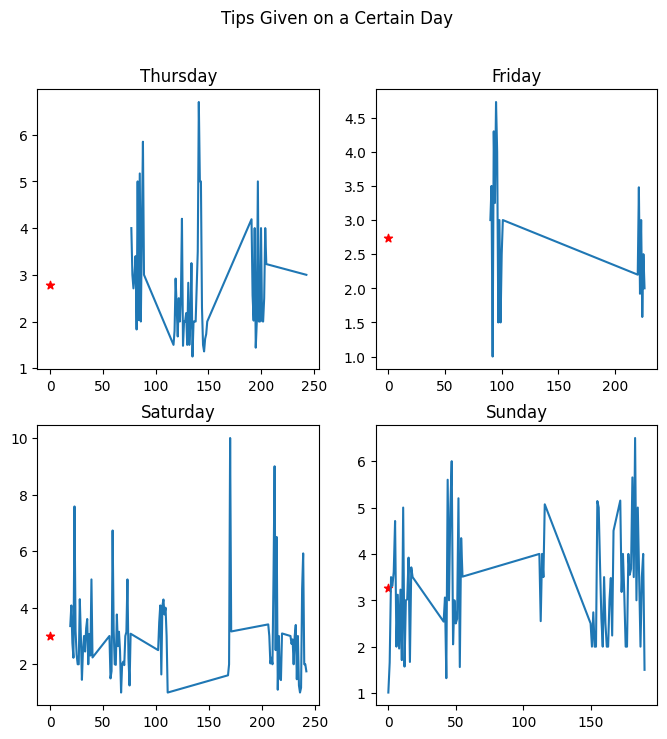

In [174]:
"""
Q27: Draw a figure with 2 by 2 subplots. Each subplot shows a line plot of the tips given on a certain day. 
     Show the average tip in each subplot. For example, these are shown as red asterisks in the diagram below. 
     Give titles to the different subplots as well as a title to the whole figure. 
     The line plt.figure(figsize=(8, 8)) can be used to specify figure dimensions in inches.
"""

fig = plt.figure(figsize=(8, 8))

# Mapping days between data frame days and formatted days
days_map = {"Thur": "Thursday", "Fri": "Friday", "Sat": "Saturday", "Sun": "Sunday"}

# Day-wise iteration
for i, day_short in enumerate(days_map.keys()):
    # Get full day name from the days_map
    day_full = days_map[day_short]

    # Filter tips for the specific day
    tips_per_day = tips.loc[tips["day"] == day_short]

    # Add subplot to fig for this specific day
    axes = fig.add_subplot(2, 2, i+1)

    # Plot day-specific data in the created subplot
    axes.plot(tips_per_day.index, tips_per_day['tip'])

    # Add day-specific average tip on the subplot, "average_per_day" is used from Q26
    axes.scatter(0, average_per_day.loc[day_short]["average_tip"], color='r', marker='*')

    # Set subplot title in full name
    axes.set_title(day_full)

# Set title on the whole figure
fig.suptitle("Tips Given on a Certain Day")
plt.show()

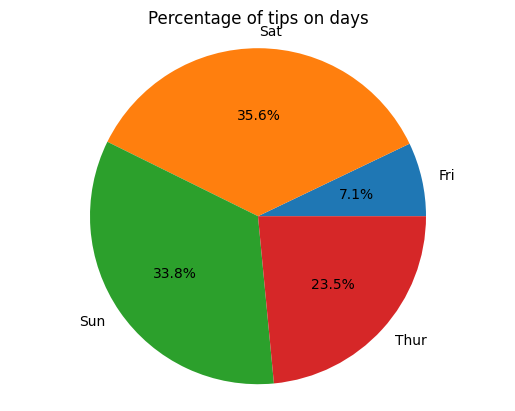

In [99]:
"""
Q28: Draw a pie chart to compare the total tip amounts collected on the different days. 
     Make sure the pie chart shows a perfect square. 
     Show percentages (including the percent sign, %,) and labels
"""

# Group by day to get day-wise total tip
total_tip_per_day = tips["tip"].groupby(tips["day"]).sum().to_frame('total_tip')

# Data of day-wise total tip
data = total_tip_per_day["total_tip"]

# Labels of days
labels = total_tip_per_day.index

# Plot data
plt.pie(data, labels=labels, autopct="%0.1f%%")

# Equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis("equal")
plt.title("Percentage of tips on days")

plt.show()

In [97]:
# PART-2

"""
Dataset Overview:

The dataset is received from the website: https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators 
It can be downloaded directly from this link: https://datacatalogfiles.worldbank.org/ddh-published/0037712/DR0090755/CLASS.xlsx?versionId=2023-09-27T16:44:25.8023254Z
The original dataset was in Excel form. Since we are using Panda's read_csv method, I have converted the format to csv.

The dataset is about classifying countries of the world based on several income groups. 
It is 12.2 kb in size and has 218 rows and 5 columns. The column attributes are:
Economy = Name of countries
Code = Country code
Region = Name of Regions or subcontinents like North America, etc.
Income group = Groups of incomes like High income, low income, etc.
Lending category = A label given by the World Bank based on the lending regulations.
"""

"""
Data Analysis Question:
Part 2, Question: How does the number of countries for the higher income group differ from relatively lower income groups?
To explain this question I will introduce two relevant experimental analyses:
Experiment 1: Draw a pie chart showing the number of countries divided into different income groups.
Experiment 2: Draw a bar chart showing the number of countries grouped by regions and income groups.
"""

# Making a data frame from the dataset
country_wise_income_group = pd.read_csv("country-wise-income-group.csv")

# Showing the first 3 rows of the data frame
print(country_wise_income_group.head(3))

       Economy Code                     Region         Income group  \
0        Aruba  ABW  Latin America & Caribbean          High income   
1  Afghanistan  AFG                 South Asia           Low income   
2       Angola  AGO         Sub-Saharan Africa  Lower middle income   

  Lending category  
0              NaN  
1              IDA  
2             IBRD  


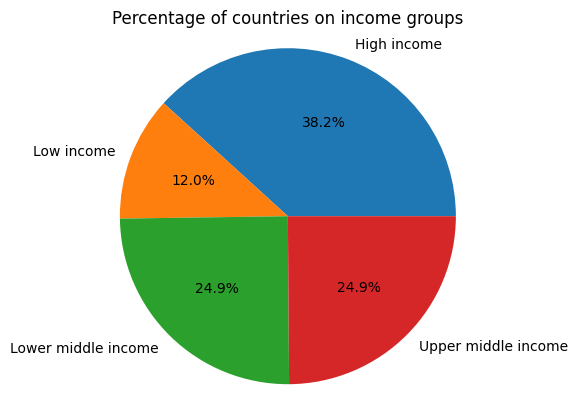

In [103]:
"""
Experiment 1: Draw a pie chart showing the number of countries divided into different income groups.
"""

# group dataset by income group
group_wise_count = country_wise_income_group.groupby("Income group").size().to_frame("count")

data = group_wise_count["count"]
labels = group_wise_count.index

# Plot data
plt.pie(data, labels=labels, autopct="%0.1f%%")

# Equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis("equal")
plt.title("Percentage of countries on income groups")

plt.show()

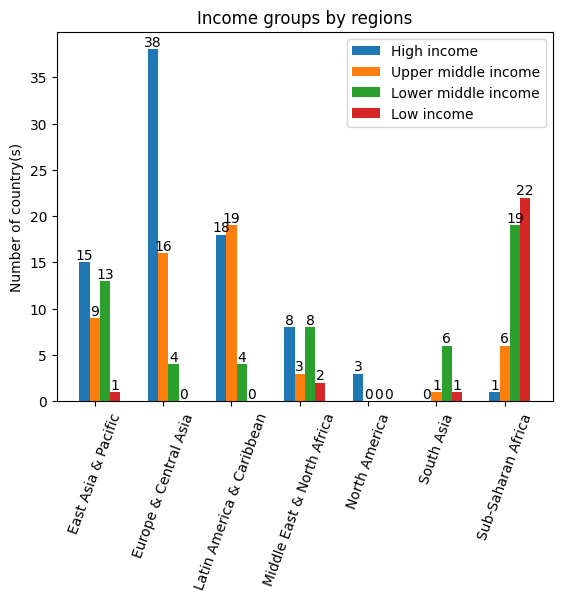

In [102]:
"""
Experiment 2: Draw a bar chart showing the number of countries grouped by regions and income groups.
"""

import numpy as np

# Group dataset by region and income group
region_and_group_wise_count = country_wise_income_group.groupby(["Region", "Income group"]).size().to_frame("count")

# Making custom ordinal rank of income groups
groups = ["High income", "Upper middle income", "Lower middle income", "Low income"]
groups_count = {group: [] for group in groups}

regions = region_and_group_wise_count.index.get_level_values("Region").unique()

# Making group-wise data for each region
for region in regions:
    group_wise_count = region_and_group_wise_count.loc[region]
    for group in groups:
        if group in group_wise_count.index:
            groups_count[group].append(group_wise_count.loc[group]["count"])
        else:
            groups_count[group].append(0)

x = np.arange(len(regions))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

# Plotting bars for each income group iteratively with location offset
for attribute, measurement in groups_count.items():
    offset = width * multiplier  # offset for each group
    bars = plt.bar(x + offset, measurement, width, label=attribute)
    plt.bar_label(bars)
    multiplier += 1  # group wise incrementation

# Texts for labels, title, custom x-axis tick labels, etc.
plt.ylabel('Number of country(s)')
plt.title('Income groups by regions')
plt.xticks(x + width, regions, rotation=70)
plt.legend(loc='upper right', ncols=1)

plt.show()

In [ ]:
"""
Part 2, Question: Conclusion
"""

"""
From experiment 1, we can observe the number of high-income countries (38.2%) dominating over other groups.
The middle-income groups are equally divided into two groups: upper and lower, with 24.9% for each.
The lower income group has only a 12% share of all countries.
"""

"""
From experiment 2, the bar chart visualizes the number of countries based on regions in detail.
We can see that high-income and upper-middle-income countries are mostly distributed over Europe, America, and East Asia regions.
And, the South Asian and African regions comprise lower-middle-income and lower-income countries most.
"""